In [1]:

import tensorflow as tf
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GUAVA

In [2]:
train_dir = 'C:/Users/HP/Desktop/train_test_split/guava/images/train'
test_dir = 'C:/Users/HP/Desktop/train_test_split/guava/images/test'
validation_dir = 'C:/Users/HP/Desktop/train_test_split/guava/images/val'

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255
   
)

# Only rescaling for validation and test data
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # ResNet-50 expects 224x224 images
    batch_size=32,
    class_mode='binary'  # Binary classification
)

validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle for evaluation
)



Found 2224 images belonging to 2 classes.
Found 478 images belonging to 2 classes.
Found 479 images belonging to 2 classes.


In [3]:
# Load ResNet-50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (optional for fine-tuning)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20 # Adjust the number of epochs as needed
)

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.5644 - loss: 0.8233 - val_accuracy: 0.5491 - val_loss: 0.6535
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 67s 960ms/step - accuracy: 0.4062 - loss: 0.7613 - val_accuracy: 0.7121 - val_loss: 0.6221
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 322s 5s/step - accuracy: 0.6119 - loss: 0.6390 - val_accuracy: 0.6652 - val_loss: 0.6021
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 61s 846ms/step - accuracy: 0.6250 - loss: 0.6281 - val_accuracy: 0.5938 - val_loss: 0.6188
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 337s 5s/step - accuracy: 0.6426 - loss: 0.6283 - val_accuracy: 0.5893 - val_loss: 0.6199
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 61s 842ms/step - accuracy: 0.5625 - loss: 0.6034 - val_accuracy: 0.6339 - val_loss: 0.5996
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 337s 5s/step - accuracy: 0.6439 - loss: 0.6182 - val_accuracy: 0.6406 - val_loss: 0.6010
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 61s 841ms/step - accuracy: 0.6250 - loss: 0.5932 - val_accuracy: 0.

In [10]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.8231 - loss: 0.5004
Test Loss: 0.5236982107162476
Test Accuracy: 0.7411273717880249


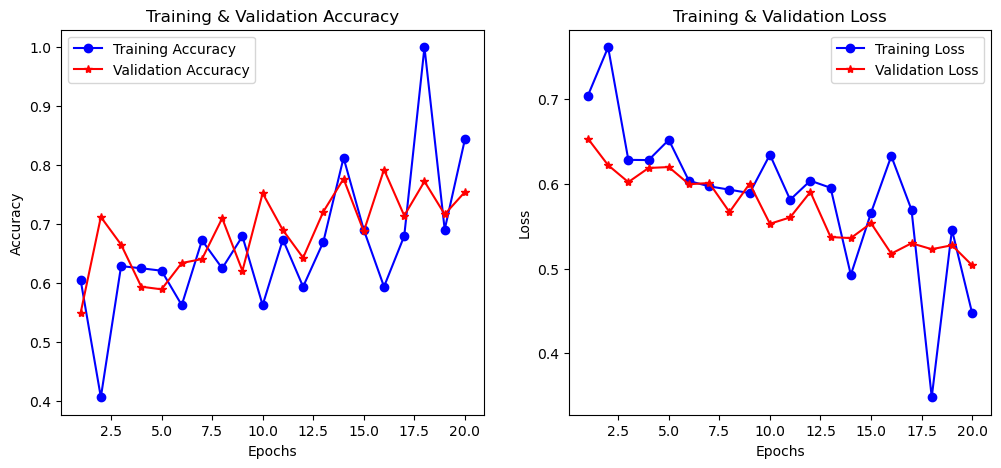

In [11]:
import matplotlib.pyplot as plt

# Plot training history
def plot_history(history):
    # Extract history data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training & Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training & Validation Loss')

    plt.show()

# Call the function
plot_history(history)
